### Labb 2 

- a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder,
glöm inte att lägga till den till .gitignore.

-----


## b)

 - Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.


In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os # Used for interacting with the operating system. Essential for file and directory operations.
import random
from PIL import Image # Part of the Pillow library, used for opening, manipulating, and saving many different image file formats.

In [3]:
!ls /kaggle/input/original-datan

train


In [4]:
# Set the directory path where the images are stored.
source_dir = "/kaggle/input/original-datan/train/train"

# List all files in the specified directory and filter to include only '.jpg' files.
image_files = [f for f in os.listdir(source_dir) if f.endswith('.jpg')]

# Randomly select 10 images from the list of jpg files.
selected_images = random.sample(image_files, 10)

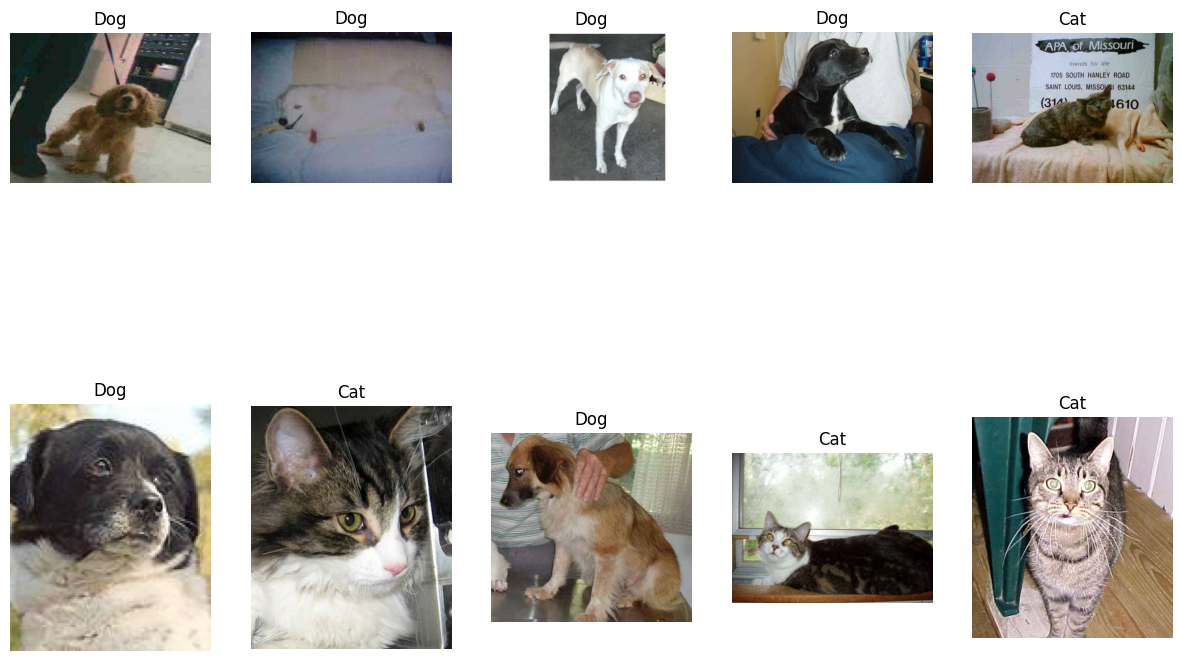

In [5]:
plt.figure(figsize=(15, 10))

# Loop through each selected image file.
for i, image_file in enumerate(selected_images):
    # Open the image file using the PIL library and join path components.
    img = Image.open(os.path.join(source_dir, image_file))
    
    # Determine the label ('Cat' or 'Dog') based on the presence of 'cat' in the file name.
    label = 'Cat' if 'cat' in image_file else 'Dog'
    
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(img) # Display the image in the current subplot.
    plt.title(label) # Set the title of the subplot to the label of the image.
    plt.axis('off')

plt.show()

------

## c)

- Skapa folderstrukturen nedan med Python

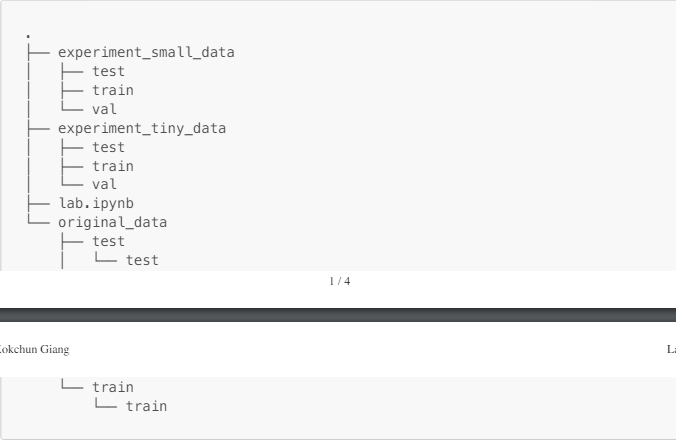     ---->      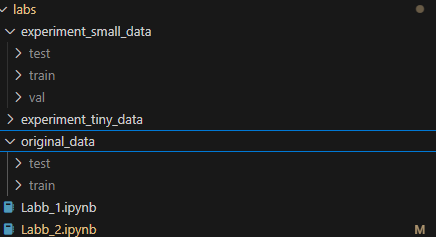

-----

### d)

- d) Nu ska du göra train|val|test split med följande splits:
    - experiment_small
    - train - 1600 (800 dogs, 800 cats)
    - val - 400 (200 dogs, 200 cats)
    - test - 500 (250 dogs, 250 cats)

Det är inte så farligt om det inte blir exakt balanserade dataset.
Det är viktigt att du samplar slumpmässigt utan replacement från originaldatasetet under respektive
experiment. Spara datan i deras respektive mappar. (**)


In [6]:
import shutil

'''
base_dir = "experiment_small_data"
source_dir = "original_data/train/train"  

sets = ['train', 'val', 'test']

# Define number of pics for each category
split_counts = {
    'train': {'dogs': 800, 'cats': 800},
    'val': {'dogs': 200, 'cats': 200},
    'test': {'dogs': 250, 'cats': 250}
}

def check_if_distribution_needed():
    # Check if distributuion already has been done.
    for set in sets:
        path = os.path.join(base_dir, set)
        if sum(len(files) for _, _, files in os.walk(path)) != sum(split_counts[set].values()):
            return True
    return False

def distribute_files():
    if not check_if_distribution_needed():
        print("Fördelning har redan slutförts. Inga ytterligare åtgärder krävs.")
        return

    # shuffle all files for ranodomness
    files = {'dogs': [f for f in os.listdir(source_dir) if 'dog' in f], 'cats': [f for f in os.listdir(source_dir) if 'cat' in f]}
    for category in files:
        random.shuffle(files[category])

    # move files 
    for set in sets:
        for category in files:
            amount = split_counts[set][category]
            selected_files = files[category][:amount]
            files[category] = files[category][amount:]  

            for file in selected_files:
                shutil.move(os.path.join(source_dir, file), os.path.join(base_dir, set, file))

distribute_files()
'''


'\nbase_dir = "experiment_small_data"\nsource_dir = "original_data/train/train"  \n\nsets = [\'train\', \'val\', \'test\']\n\n# Define number of pics for each category\nsplit_counts = {\n    \'train\': {\'dogs\': 800, \'cats\': 800},\n    \'val\': {\'dogs\': 200, \'cats\': 200},\n    \'test\': {\'dogs\': 250, \'cats\': 250}\n}\n\ndef check_if_distribution_needed():\n    # Check if distributuion already has been done.\n    for set in sets:\n        path = os.path.join(base_dir, set)\n        if sum(len(files) for _, _, files in os.walk(path)) != sum(split_counts[set].values()):\n            return True\n    return False\n\ndef distribute_files():\n    if not check_if_distribution_needed():\n        print("Fördelning har redan slutförts. Inga ytterligare åtgärder krävs.")\n        return\n\n    # shuffle all files for ranodomness\n    files = {\'dogs\': [f for f in os.listdir(source_dir) if \'dog\' in f], \'cats\': [f for f in os.listdir(source_dir) if \'cat\' in f]}\n    for category in

In [7]:
'''
directories = ["experiment_small_data/train", "experiment_small_data/test", "experiment_small_data/val"]


def count_files(directory):
    dog_count = sum('dog' in f for f in os.listdir(directory))
    cat_count = sum('cat' in f for f in os.listdir(directory))
    return dog_count, cat_count


for directory in directories:
    dogs, cats = count_files(directory)
    print(f"{directory}:")
    print("Dogs:", dogs)
    print("Cats:", cats)
'''


'\ndirectories = ["experiment_small_data/train", "experiment_small_data/test", "experiment_small_data/val"]\n\n\ndef count_files(directory):\n    dog_count = sum(\'dog\' in f for f in os.listdir(directory))\n    cat_count = sum(\'cat\' in f for f in os.listdir(directory))\n    return dog_count, cat_count\n\n\nfor directory in directories:\n    dogs, cats = count_files(directory)\n    print(f"{directory}:")\n    print("Dogs:", dogs)\n    print("Cats:", cats)\n'

----------

### e) 
Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som
ska vara one-hot encoded med 0 och 1.
- plotta några bilder med deras respektive labels och kontrollera att det är korrekt.
- skapa lämplig plot för att kontrollera att dataseten är balanserade
- skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex [0, 0, ... 0, 1, 1, ..., 1]




Funktion som laddar bilder från en mapp och extraherar deras labels.
- Blandar ordningen på filnamnen. Detta säkerställer att ordningen på filerna i mappen är slumpmässig innan bilderna laddas och etiketterna extraheras
- Loopar igenom filer i mapp (directory).
- Laddar varje bild och konverterar den till en numpy-array.
- Hämtar etiketten för varje bild baserat på filnamnet (om "dog" finns i filnamnet sätts etiketten till 0, annars sätts den till 1).
- Returnerar bilder och etiketter som numpy-arrays.

Etiketterna för bilderna i tränings-, validerings- och testmapparna konverteras till one-hot encoding-formatet.



In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical


def load_images_and_labels(directory):
    # Get a list of filenames in the directory
    file_names = os.listdir(directory)
    # Shuffle the list to randomize the order of files
    random.shuffle(file_names)
    
    # Using list comprehension to load images and create labels
    images = []
    labels = []
    for file in file_names:
        if os.path.isfile(os.path.join(directory, file)):
            try:
                img_path = os.path.join(directory, file)
                img = load_img(img_path)
                img_array = img_to_array(img) / 255.0  # Normalize the image
                images.append(img_array)
                labels.append(0 if 'dog' in file else 1)
            except Exception as e:
                print(f"Error loading image: {img_path}. {e}")

    return images, np.array(labels)

# Directory paths
train_dir = "/kaggle/input/train-datan/train"
val_dir = "/kaggle/input/val-datan/val"
test_dir = "/kaggle/input/test-datan/test"

# Load images and labels from the directories
X_train, y_train = load_images_and_labels(train_dir)
X_val, y_val = load_images_and_labels(val_dir)
X_test, y_test = load_images_and_labels(test_dir)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)






2024-05-14 11:56:32.599524: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 11:56:32.599636: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 11:56:32.701611: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


plotta några bilder med deras respektive labels och kontrollera att det är korrekt
- ser korrekt ut

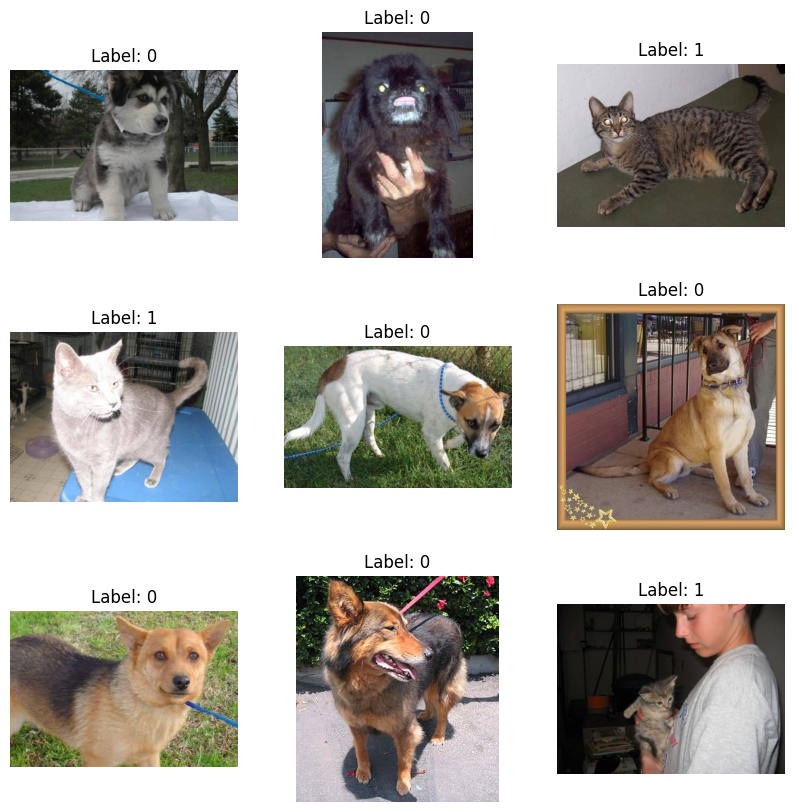

In [9]:
num_images = 9  
plt.figure(figsize=(10, 10))

# Pick random images from training folder
train_files = os.listdir(train_dir)
random_files = np.random.choice(train_files, size=num_images, replace=False)

for i, file in enumerate(random_files):
    img_path = os.path.join(train_dir, file)
    img = load_img(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    
    # get label 
    label_index = 0 if 'dog' in file.split('.')[0] else 1  # 0 for dog 1 for cat
    plt.title("Label: " + str(label_index))  
    plt.axis("off")

plt.show()

skapa lämplig plot för att kontrollera att dataseten är balanserade


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


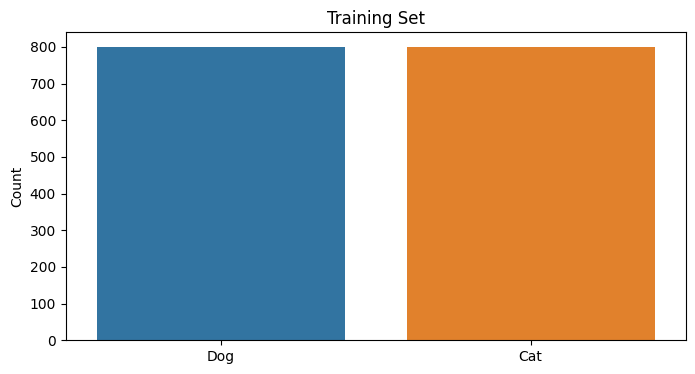

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


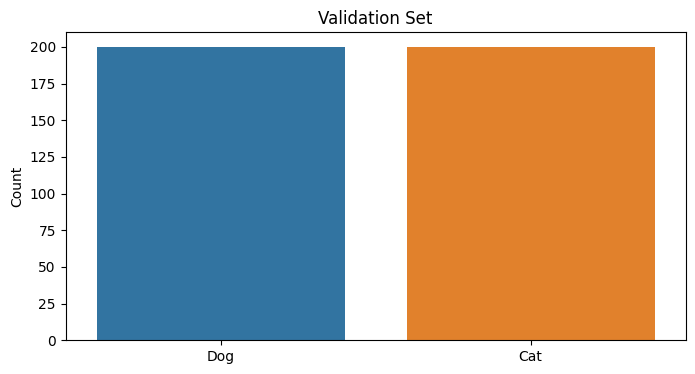

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


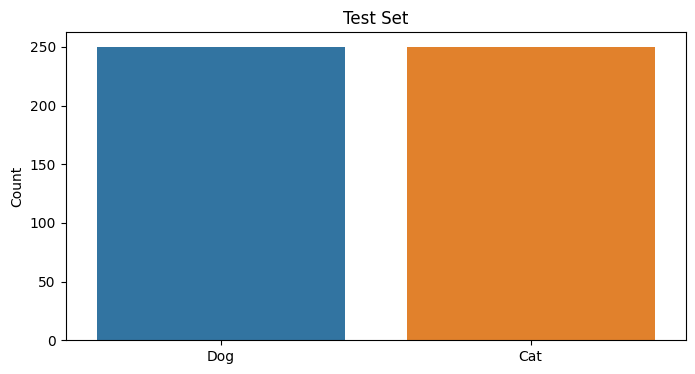

In [10]:
def plot_class_distribution(y_data, title):
    
    class_sums = np.sum(y_data, axis=0)
    classes = ['Dog', 'Cat']
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=classes, y=class_sums)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()


plot_class_distribution(y_train, "Training Set")
plot_class_distribution(y_val, "Validation Set")
plot_class_distribution(y_test, "Test Set")




skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex
[0, 0, ... 0, 1, 1, ..., 1]

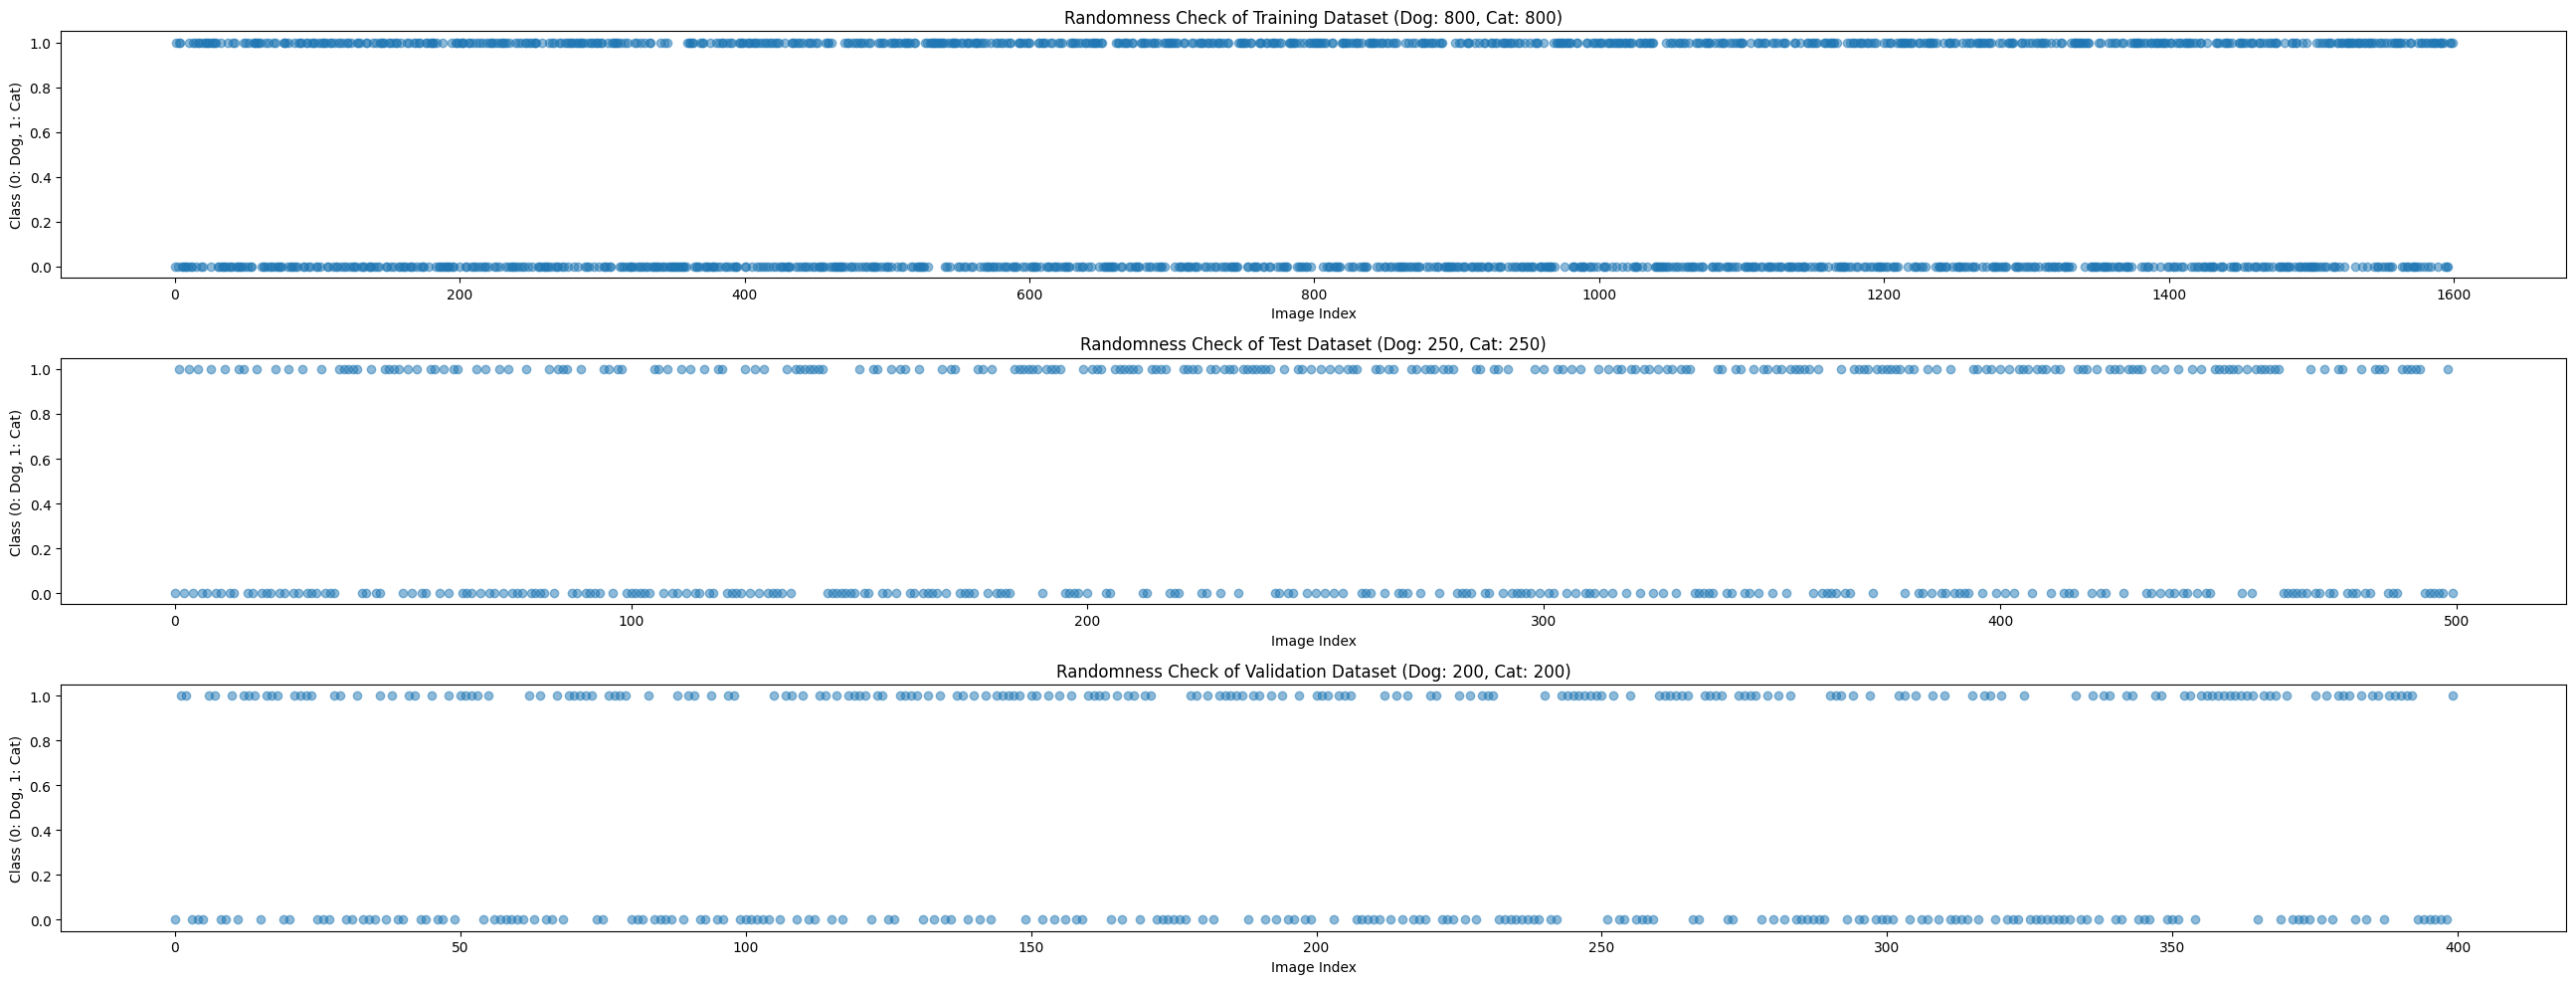

In [11]:
# Count the occurrences of each class in the training, test, and validation data
train_class_counts = np.bincount(y_train.argmax(axis=1))
test_class_counts = np.bincount(y_test.argmax(axis=1))
val_class_counts = np.bincount(y_val.argmax(axis=1))

# Create three line plots to show the distribution of classes in the training, test, and validation data
plt.figure(figsize=(26, 10))

# Training data
plt.subplot(3, 1, 1)
plt.plot(range(len(y_train)), y_train.argmax(axis=1), marker='o', linestyle='', alpha=0.5)
plt.title(f'Randomness Check of Training Dataset (Dog: {train_class_counts[0]}, Cat: {train_class_counts[1]})')
plt.xlabel('Image Index')
plt.ylabel('Class (0: Dog, 1: Cat)')

# Test data
plt.subplot(3, 1, 2)
plt.plot(range(len(y_test)), y_test.argmax(axis=1), marker='o', linestyle='', alpha=0.5)
plt.title(f'Randomness Check of Test Dataset (Dog: {test_class_counts[0]}, Cat: {test_class_counts[1]})')
plt.xlabel('Image Index')
plt.ylabel('Class (0: Dog, 1: Cat)')

# Validation data
plt.subplot(3, 1, 3)
plt.plot(range(len(y_val)), y_val.argmax(axis=1), marker='o', linestyle='', alpha=0.5)
plt.title(f'Randomness Check of Validation Dataset (Dog: {val_class_counts[0]}, Cat: {val_class_counts[1]})')
plt.xlabel('Image Index')
plt.ylabel('Class (0: Dog, 1: Cat)')

plt.tight_layout()
plt.show()





-----

### 1. Bildbehandling (*)

Uppgifterna nedan ska upprepas för respektive experimentdataset om du också väljer att arbeta med
tinydatasetet.
- a) Skapa en plot för att visualisera bildstorlekarna i träningsdatan. Använd seaborns jointplot.
- b) Välj en lämplig bildstorlek att ändra samtliga bilder till. Gör en analys och fundera på om du behöver
slänga bilder. Hur kommer du fram till ditt val?
- c) Gör resize sådant att samtliga bilder är samma storlek och spara dem i numpy arrays med följande
struktur:
(samples, row, cols, color_channels)
Visualisera därefter ett par styckena bilder.
- d) Augmentera datan. Varför behövs dataaugmentering och hur beslutar du vilka parametrar du valt för
augmenteringen?

Skapa en plot för att visualisera bildstorlekarna i träningsdatan. Använd seaborns jointplot.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


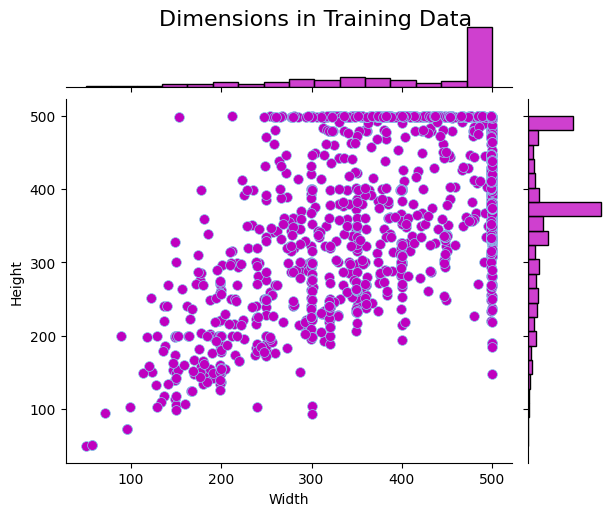

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


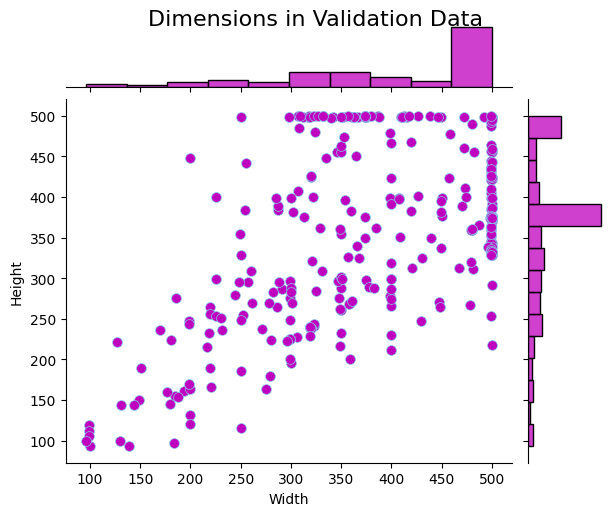

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


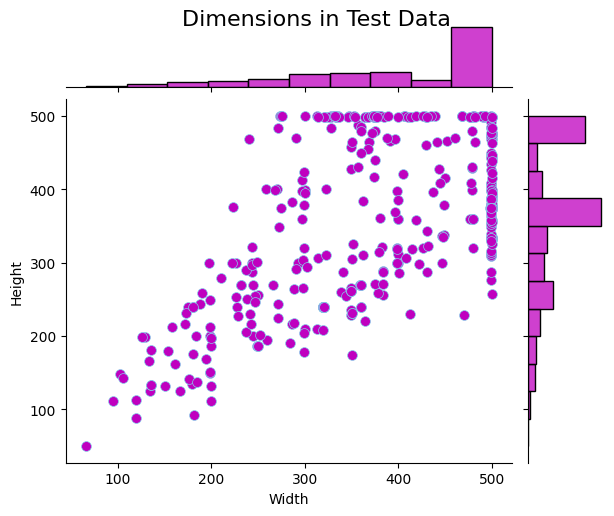

In [12]:
def plot_image_dimensions(X, title, plot_height=6):
    
    heights = [img.shape[0] for img in X]
    widths = [img.shape[1] for img in X]

    data = pd.DataFrame({'Height': heights, 'Width': widths})

    g = sns.jointplot(data=data, x='Width', y='Height', kind='scatter', color='m', s=50, edgecolor="skyblue", linewidth=0.5, height=plot_height)
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.95)  

    g.fig.set_figwidth(6)  
    g.fig.set_figheight(5)  

    plt.show()


plot_image_dimensions(X_train, 'Dimensions in Training Data', plot_height=8)
plot_image_dimensions(X_val, 'Dimensions in Validation Data', plot_height=8)
plot_image_dimensions(X_test, 'Dimensions in Test Data', plot_height=8)




Välj en lämplig bildstorlek att ändra samtliga bilder till. Gör en analys och fundera på om du behöver
slänga bilder. Hur kommer du fram till ditt val?

- Då det verkar som att de flesta eller iaf många bilder ligger i det högre spannet av 500 i antingen height eller width så kanske den storleken är för stor för modellen senare!?. Jag tänker att kanske runt 300x300 borde vara en okej storlek och då bör väl detaljerna bevaras utan att vara för stor så beräkningarna tar för lång tid.


Gör resize sådant att samtliga bilder är samma storlek och spara dem i numpy arrays med följande
struktur:
(samples, row, cols, color_channels)

Ändra Storlek på Bilderna till 300x300 och konverterar listan av bilder till en 4d array med shapen (samples, rows, cols, color_channels)

In [48]:
from PIL import Image

def process_images(image_list, target_size=(256, 256)):
    # List to store resized images
    resized_images = []
    
    for img in image_list:
        if isinstance(img, np.ndarray):
            img = Image.fromarray((img * 255).astype('uint8'))  # Convert numpy array to PIL Image if necessary
        # Resize image using LANCZOS method for high quality
        resized_img = img.resize(target_size, Image.Resampling.LANCZOS)
        # Add resized image to the list
        resized_images.append(np.array(resized_img) / 255.0)  # Convert back to numpy array and normalize
        
    # Convert list of images to a 4D numpy array with shape (samples, rows, cols, color_channels)
    return np.stack(resized_images, axis=0)

X_train_resized = process_images(X_train)
X_val_resized = process_images(X_val)
X_test_resized = process_images(X_test)

# Check the shape of the resized arrays
print("Train Data Shape:", X_train_resized.shape)
print("Validation Data Shape:", X_val_resized.shape)
print("Test Data Shape:", X_test_resized.shape)




Train Data Shape: (1600, 256, 256, 3)
Validation Data Shape: (400, 256, 256, 3)
Test Data Shape: (500, 256, 256, 3)


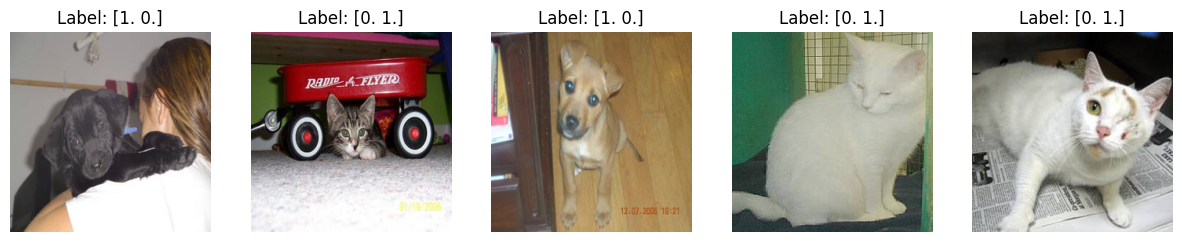

In [49]:

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train_resized[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()


------

### 2. Träna modeller (*)
För uppgifterna nedan, jobba med dataseten en åt gången:
small
utan augmentering
med augmentering
tiny (BONUS)
utan augmentering
med augmentering
- a) Använd följande nätverk och träna på datan. Gör hyperparametertuning för några parametrar (beskriv
hur du gör). Visualisera och analysera loss-kurvor, accuracy-kurvor.

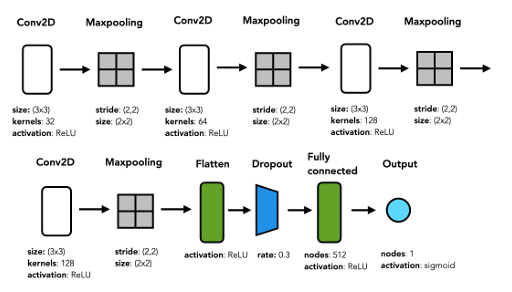


- b) Förändra nätverket i a) experimentera och ändra i lite komponenter. Beskriv vad du ändrar och varför.
Glöm inte att evaluera på valideringsdatan.
- c) Välj en modell, träna på tränings- och valideringsdatan. Gör inferens på testdatan och utvärdera din
modell.
- d) Tag ett eller flera av nätverken (VGG16, Resnet, Xception, Inception), läs deras forskningsartikel,
sammanfatta kort ca 1/2 - 1 sida för en artikel. Utför därefter transfer learning och evaluera din modell.
Beskriv också hur transfer learning fungerar.


### a) 
- a) Använd följande nätverk och träna på datan. Gör hyperparametertuning för några parametrar (beskriv
hur du gör). Visualisera och analysera loss-kurvor, accuracy-kurvor.

- Följande kod tränar datan genom modellen som är lite tweakad från den som finns alldeles ovanför här då den gav en hel del fel för mig. 

- Efter modellen så beräknas antalet steg per epok och valideringssteg baserat på storleken av tränings- och valideringsdatan samt batchstorleken. 
Genom att definiera steps_per_epoch och validation_steps ser jag till att hela datasetet används under varje epok.

- Skapar en callback för att stoppa träningen tidigt om valideringsförlusten inte förbättras under 15 epoker.

- Konverterar tränings- och valideringsdatan till TensorFlow Dataset-objekt, shuffle träningsdatan, batchar dem med storlek 32 och repetera dem för kontinuerlig användning under träning.

- Tränar modellen med träningsdatan och valideringsdatan, med hjälp av early stopping callback.







In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam

def CNN_model(learning_rate=0.0001, drop_rate=0.5, kernel_config=[32, 64, 128, 128]):
    adam = Adam(learning_rate=learning_rate)

    model = Sequential(name="CNN_model")
    model.add(Input(shape=(256, 256, 3))) # Add an input layer with the specified input shape
    model.add(Conv2D(kernel_config[0], kernel_size=(3, 3), activation="relu", kernel_initializer="he_normal")) # Add the first Conv2D layer
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2)) # Add the first MaxPooling2D layer
    
    # Add additional Conv2D and MaxPooling2D layers based on kernel_config
    for kernels in kernel_config[1:]:
        model.add(Conv2D(kernels, kernel_size=(3, 3), activation="relu", kernel_initializer="he_normal"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

    model.add(Flatten()) # Flatten the output from the convolutional layers
    model.add(Dropout(drop_rate)) # Add a Dropout layer to prevent overfitting
    model.add(Dense(512, activation="relu", kernel_initializer="he_normal")) # Add a Dense (fully connected) layer with 512 units
    model.add(Dense(2, activation="softmax")) # Add the output layer with 2 units (for binary classification) and softmax activation

    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

    return model


model = CNN_model()
model.summary()


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,087,426 (49.92 MB)

 Trainable params: 13,087,426 (49.92 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=15) # Define early stopping callback to stop training when validation loss doesn't improve

# Calculate steps per epoch and validation steps
steps_per_epoch = len(X_train_resized) // 32 + 1
validation_steps = len(X_val_resized) // 32 + 1

# Create TensorFlow datasets for training and validation data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resized, y_train)).shuffle(buffer_size=1600).batch(32).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_resized, y_val)).batch(32).repeat()

# Train the model
history_no_aug = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,  
    epochs=100,
    validation_data=val_dataset,
    validation_steps=validation_steps,  
    callbacks=[early_stopping]
)


Epoch 1/100
 3/51 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.4861 - loss: 2.2538

W0000 00:00:1715691326.420096     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5094 - loss: 1.2300

W0000 00:00:1715691331.115393     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - accuracy: 0.5100 - loss: 1.2231 - val_accuracy: 0.6200 - val_loss: 0.6669
Epoch 2/100
 2/51 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6094 - loss: 0.6406

W0000 00:00:1715691333.989075     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.5875 - loss: 0.6672 - val_accuracy: 0.6525 - val_loss: 0.6272
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7080 - loss: 0.5747 - val_accuracy: 0.6675 - val_loss: 0.5986
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7136 - loss: 0.5460 - val_accuracy: 0.6800 - val_loss: 0.6052
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.7947 - loss: 0.4528 - val_accuracy: 0.5925 - val_loss: 0.7357
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.8238 - loss: 0.4087 - val_accuracy: 0.6750 - val_loss: 0.6195
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.8710 - loss: 0.3390 - val_accuracy: 0.7100 - val_loss: 0.6292
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8891 - loss: 0.2764 - val_accuracy: 0.6775 - val_loss: 0.6757
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.8881 - loss: 0.2632 - val_accuracy: 0.6800 - val_l

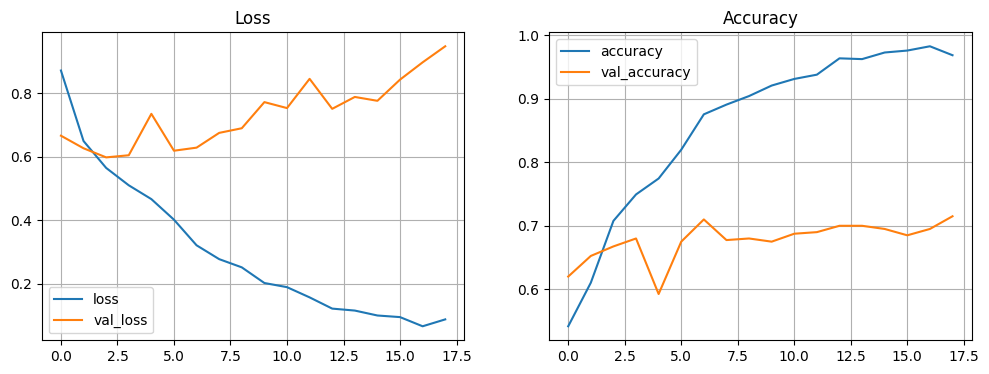

In [54]:
metrics = pd.DataFrame(history_no_aug.history)

def plot_metrics(metrics):
    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    metrics[["loss", "val_loss"]].plot(ax=ax[0], title="Loss", grid=True)
    metrics[["accuracy", "val_accuracy"]].plot(ax=ax[1], title="Accuracy", grid=True)
    
plot_metrics(metrics)


plt.show()
    